<a href="https://colab.research.google.com/github/ananthu-raj/A-novel-approach-to-Entity-Resolution/blob/main/Entity_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entity Resolution**

In [40]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import warnings
import statistics
from statistics import mean
%matplotlib inline

# Text datasets
from bs4 import BeautifulSoup
import nltk
import sklearn
import re
import string

from tqdm import tqdm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#!pip install imblearn

In [2]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
from keras import backend as K

In [3]:
am = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/am.csv')
go = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/go.csv')
match = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/Amzon_GoogleProducts_perfectMapping.csv')

In [4]:
am

,a_id,a_title,a_description,a_price
0,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.00
1,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,599.99
2,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,99.99
3,b000ehpzv8,emc retrospect 7.5 disk to disk windows,emc retrospect 7.5 disk to diskcromwindows,0.00
4,b00021xhzw,adobe after effects professional 6.5 upgrade f...,upgrade only; installation of after effects st...,499.99
...,...,...,...,...
1243,b000in8mj0,photostory on cd & dvd 5,magix photostory on cd and dvd 5 answers the q...,19.99
1244,b000cs3s2c,flash remoting 1 alp ret eng cd 2u,- marketing information: macromedia flash remo...,3314.09
1245,b000h1df7w,dragon naturally speaking standard v9,dragon naturallyspeaking 9 (standard edition) ...,99.99
1246,b000p9cr66,mediarecover,mediarecover gives you the ability to recover ...,29.99


In [5]:
go

,g_id,g_ititle,g_description,g_price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,805.99
...,...,...,...,...
3030,http://www.google.com/base/feeds/snippets/1487...,jumpstart(r) advanced 1st grade,prepare your child for the 1st grade and beyon...,19.99
3031,http://www.google.com/base/feeds/snippets/1491...,ibm(r) viavoice(r) advanced edition 10,ibm viavoice advanced edition release 10 is a ...,78.95
3032,http://www.google.com/base/feeds/snippets/1497...,xbox 360: gears of war,as marcus fenix you fight a war against the im...,59.99
3033,http://www.google.com/base/feeds/snippets/1498...,documents to go premium 7.0,this pda software enables you to use your docu...,49.99


In [6]:
match

,idAmazon,idGoogleBase
0,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...
1,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...
2,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...
3,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...
4,b00021xhzw,http://www.google.com/base/feeds/snippets/1843...
...,...,...
1295,b00005bigp,http://www.google.com/base/feeds/snippets/1773...
1296,b000h1df7w,http://www.google.com/base/feeds/snippets/1773...
1297,b000p9cr66,http://www.google.com/base/feeds/snippets/1772...
1298,b000p9cr66,http://www.google.com/base/feeds/snippets/1321...


## **Data Cleaning**

In [7]:
#am
newam = pd.DataFrame(np.repeat(am.values, len(go), axis=0))
newam.columns = am.columns
#go
newgo = pd.concat([go[:len(go)]]*len(am), ignore_index=True)
# adding newam and newgo along columns
res = [newam, newgo]
df = pd.concat(res, axis=1)

In [8]:
# Converting to proper datatypes by default 
df = df.convert_dtypes()
print(df.dtypes)

a_id              string
a_title           string
a_description     string
a_price          Float64
g_id              string
g_ititle          string
g_description     string
g_price           string
dtype: object


In [9]:
a_list = df['a_id'].tolist()
g_list = df['g_id'].tolist()
# Function to merge two lists pair wise
def merge(list1, list2):
    merged_list = [[list1[i], list2[i]] for i in range(0, len(list1))]
    return merged_list
x = merge(a_list,g_list)
ad = match['idAmazon'].tolist()
gd = match['idGoogleBase'].tolist()
y = merge(ad,gd)
def find(lst1,lst2):
    result = []
    for i in tqdm(range(len(lst1))):
        for j in range(len(lst2)):
            if lst1[i]==lst2[j]:
                result.append(i)
            
    return result

In [10]:
def find_1(lst1,lst2):
    result = [i for i in tqdm(range(len(lst1))) for j in range(len(lst2)) if lst1[i]==lst2[j]]
    return result

In [11]:
l = find_1(x,y)
#l = find(x,y)

100%|██████████| 3787680/3787680 [09:31<00:00, 6632.78it/s]


In [12]:
list_of_zeros = [0] * len(df)
for i in tqdm(range(len(l))):
    list_of_zeros.pop(l[i])
list_of_zeros
for i in tqdm(range(len(l))):
    list_of_zeros.insert(l[i],1)
df['match'] = list_of_zeros

100%|██████████| 1161/1161 [00:02<00:00, 510.98it/s] 


In [13]:
df

,a_id,a_title,a_description,a_price,g_id,g_ititle,g_description,g_price,match
0,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,38.99,0
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,8.49,0
2,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,637.99,0
3,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,12.95,0
4,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,805.99,0
...,...,...,...,...,...,...,...,...,...
3787675,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1487...,jumpstart(r) advanced 1st grade,prepare your child for the 1st grade and beyon...,19.99,0
3787676,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1491...,ibm(r) viavoice(r) advanced edition 10,ibm viavoice advanced edition release 10 is a ...,78.95,0
3787677,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1497...,xbox 360: gears of war,as marcus fenix you fight a war against the im...,59.99,0
3787678,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1498...,documents to go premium 7.0,this pda software enables you to use your docu...,49.99,0


In [14]:
df.match.value_counts()

0    3786519
1       1161
Name: match, dtype: int64

In [15]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787680 entries, 0 to 3787679
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   a_id           string 
 1   a_title        string 
 2   a_description  string 
 3   a_price        Float64
 4   g_id           string 
 5   g_ititle       string 
 6   g_description  string 
 7   g_price        string 
 8   match          int64  
dtypes: Float64(1), int64(1), string(7)
memory usage: 7.7 GB


# **Statistical Analysis**
## **Label Distribution**

In [16]:
#list of matches
mat = df['match'].tolist()

## **Checking Distribution of class label : 1**

No of Dataset splits: 37
No of Data Points in each split: 102370


Text(6, 4.5, 'No of Data Splits : 37')

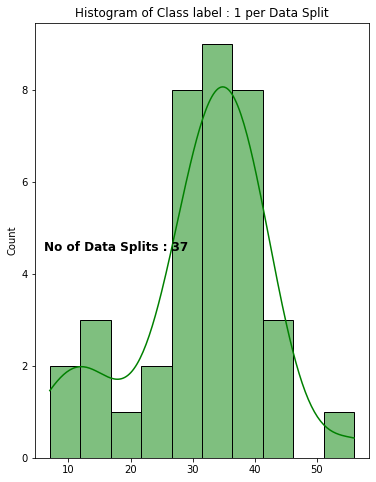

In [17]:
n=37 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(1))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
fig, ax = plt.subplots(figsize=(6, 8))
sns.histplot(x=count,bins = 10,color='g', kde=True).set(title='Histogram of Class label : 1 per Data Split')
# add text annotation
plt.text(6, 4.5, "No of Data Splits : 37", horizontalalignment='left', size='large', color='black', weight='semibold')

## **Checking Distribution of 0 class label**

No of Dataset splits: 37
No of Data Points in each split: 102370


[Text(0.5, 1.0, 'Histogram of Class label : 0 per Data Split')]

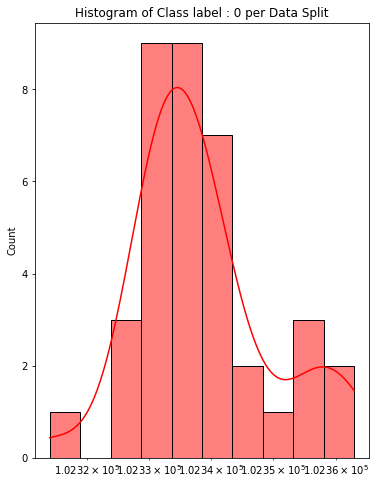

In [18]:
n=37 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(0))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
fig, ax = plt.subplots(figsize=(6, 8))
sns.histplot(x=count,bins = 10,color='r', kde=True, log_scale=True).set(title='Histogram of Class label : 0 per Data Split')

## **Trying with different number of splits**

No of Dataset splits: 50
No of Data Points in each split: 75754


Text(6, 10, 'No of Data Splits : 50')

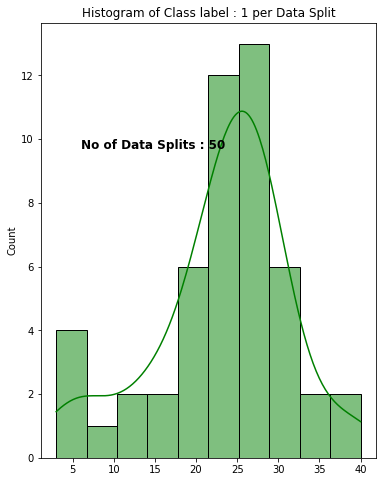

In [19]:
n=50 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(1))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6, 8))
sns.histplot(x=count,bins = 10,color='g', kde=True).set(title='Histogram of Class label : 1 per Data Split')
plt.text(6, 10, "No of Data Splits : 50", verticalalignment='top', size='large', color='black', weight='semibold')

No of Dataset splits: 50
No of Data Points in each split: 75754


[Text(0.5, 1.0, 'Histogram of Class label : 0 per Data Split')]

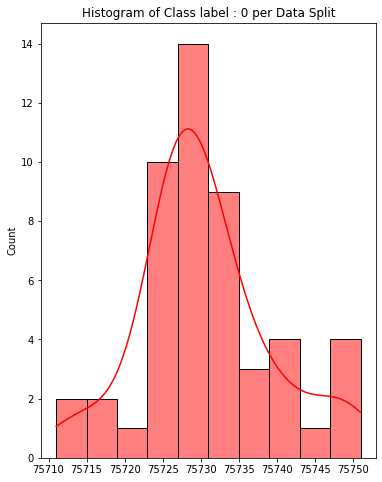

In [20]:
n=50 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(0))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
fig, ax = plt.subplots(figsize=(6, 8))
sns.histplot(x=count,bins = 10,color='r', kde=True).set(title='Histogram of Class label : 0 per Data Split')

No of Dataset splits: 100
No of Data Points in each split: 37877


Text(10, 20, 'No of Data Splits : 100')

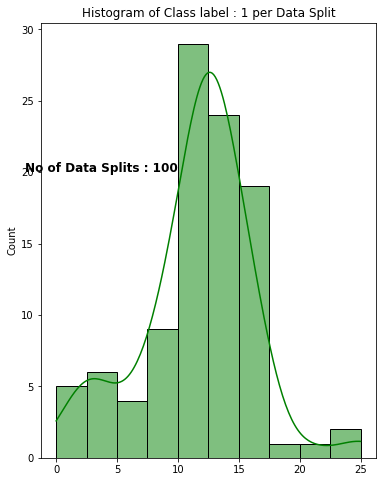

In [21]:
n=100 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(1))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6, 8))
sns.histplot(x=count,bins = 10,color='g', kde=True).set(title='Histogram of Class label : 1 per Data Split')
plt.text(10, 20, "No of Data Splits : 100", horizontalalignment='right', size='large', color='black', weight='semibold')

### **Thus its observed that the class labels (both 0 and 1 ) follow normal distribution when the data is split into parts and the count of labels per split is calculated.**


## **Statistical Test on Dataset Splits**


In [22]:
n=37 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))

def pair_it(list1):
    pair = [[list1[i], list1[i+1]] for i in range(0, len(list1)-2)]
    return pair
p = pair_it(l)
count = []
for i,j in p:
    count.append(mat[i:j].count(1))
count
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)

No of Dataset splits: 37
No of Data Points in each split: 102370


In [23]:
sd = statistics.pstdev(count)
mu = statistics.mean(count)

In [24]:
n=37 # No of splits of dataset
N = math.ceil(len(mat)/n) # NO of datapoints in each split
l = list(range(0, N*(n+2), N))
pair = [[l[i], l[i+1]] for i in range(0, len(l)-2)]
count = []
for i,j in pair:
    count.append(mat[i:j].count(1))
count
sd = statistics.pstdev(count)
mu = statistics.mean(count)
print("No of Dataset splits:",len(count))
print("No of Data Points in each split:",N)
print("Mean:",mu)
print("Standard Deviation:",sd)
st = [n,N,mu,sd]

No of Dataset splits: 37
No of Data Points in each split: 102370
Mean: 31.37837837837838
Standard Deviation: 10.414001363422724


# **Z Test**

### **Null Hypothesis:** There is significant difference between mean and standard deviation at LOS 0.05
### **Alternate Hypothesis:** There is no significant difference between mean and standard deviation

In [25]:
from statsmodels.stats.weightstats import ztest
def test(n):
    N = math.ceil(len(mat)/n) # NO of datapoints in each split
    l = list(range(0, N*(n+2), N))
    pair = [[l[i], l[i+1]] for i in range(0, len(l)-2)]
    count = []
    for i,j in pair:
        count.append(mat[i:j].count(1))
    count
    sd = statistics.pstdev(count)
    mu = statistics.mean(count)
    z_test ,p_value = ztest(count, x2=None, value=0)
    if p_value<0.05:
        s = "Alternative hypothesis Accepted"
    else:
        s = "Alternative hypothesis Rejected"
    
    st = [n,N,mu,sd,z_test,float(p_value),s]
    return st
t = [['No of Data Splits','Data Points per Split',"Mean of Count of label",
      "SD of count of label","Z Value","p Value","Conclusion"]]
for i in [30,33,37,50,100,200,300,500,650,1000,5000,10000]:
    t.append(test(i))
stat  = pd.DataFrame(t[1:],columns=t[0]) 
stat
    

,No of Data Splits,Data Points per Split,Mean of Count of label,SD of count of label,Z Value,p Value,Conclusion
0,30,126256,38.700000,12.304877,16.936852,2.406646e-64,Alternative hypothesis Accepted
1,33,114779,35.181818,11.701993,17.007224,7.259683e-65,Alternative hypothesis Accepted
2,37,102370,31.378378,10.414001,18.078572,4.701019e-73,Alternative hypothesis Accepted
3,50,75754,23.220000,7.968162,20.398683,1.717814e-92,Alternative hypothesis Accepted
4,100,37877,11.610000,4.531876,25.490115,2.537209e-143,Alternative hypothesis Accepted
5,200,18939,5.805000,2.560659,31.979892,2.075968e-224,Alternative hypothesis Accepted
6,300,12626,3.870000,1.825678,36.654085,3.939169e-294,Alternative hypothesis Accepted
7,500,7576,2.322000,1.278404,40.573687,0.000000e+00,Alternative hypothesis Accepted
8,650,5828,1.786154,1.065021,42.725094,0.000000e+00,Alternative hypothesis Accepted
9,1000,3788,1.161000,0.870103,42.173958,0.000000e+00,Alternative hypothesis Accepted


In [26]:
df = df.drop(columns=["a_id","g_id",'a_price', 'g_price'])

In [27]:
# Removing punctuations
data=df.iloc[:,0:4]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [28]:
data

,a_title,a_description,g_ititle,g_description
0,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,learning quickbooks,learning quickbooks
1,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,superstart fun with reading writing,fun with reading writing is designed to hel...
2,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,qb pos basic software,qb pos basic retail mngmt software for re...
3,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,math missions the amazing arcade adventure g...,save spectacle city by disrupting randall unde...
4,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,production prem cs mac upgrad,adobe cs production premium mac upgrade from ...
...,...,...,...,...
3787675,photo explosion,photo explosion,jumpstart r advanced st grade,prepare your child for the st grade and beyon...
3787676,photo explosion,photo explosion,ibm r viavoice r advanced edition,ibm viavoice advanced edition release is a ...
3787677,photo explosion,photo explosion,xbox gears of war,as marcus fenix you fight a war against the im...
3787678,photo explosion,photo explosion,documents to go premium,this pda software enables you to use your docu...


In [29]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787680 entries, 0 to 3787679
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   a_title        string
 1   a_description  string
 2   g_ititle       string
 3   g_description  string
dtypes: string(4)
memory usage: 6.8 GB


## **Handling Imbalanced Class Labels**

In [32]:
from sklearn.preprocessing import LabelEncoder
X = data
Y = df['match']
le = LabelEncoder()
y = le.fit_transform(Y)
y = y.reshape(-1,1)

In [33]:
X

,a_title,a_description,g_ititle,g_description
0,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,learning quickbooks,learning quickbooks
1,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,superstart fun with reading writing,fun with reading writing is designed to hel...
2,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,qb pos basic software,qb pos basic retail mngmt software for re...
3,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,math missions the amazing arcade adventure g...,save spectacle city by disrupting randall unde...
4,ca international arcserve lap desktop oem pk,oem arcserve backup v win u for laptops ...,production prem cs mac upgrad,adobe cs production premium mac upgrade from ...
...,...,...,...,...
3787675,photo explosion,photo explosion,jumpstart r advanced st grade,prepare your child for the st grade and beyon...
3787676,photo explosion,photo explosion,ibm r viavoice r advanced edition,ibm viavoice advanced edition release is a ...
3787677,photo explosion,photo explosion,xbox gears of war,as marcus fenix you fight a war against the im...
3787678,photo explosion,photo explosion,documents to go premium,this pda software enables you to use your docu...


## **Handling Imbalanced Labels**

In [35]:
from imblearn.under_sampling import RandomUnderSampler
# sampling strategy set to 0.3
under_sampler  = RandomUnderSampler(sampling_strategy=.3) 
X_under, y_under = under_sampler.fit_resample(X, y)
y_und = pd.Series(y_under)

print('Before Undersampling, the shape of X: {}'.format(X.shape))
print('Before Undersampling, the shape of y: {} \n'.format(y.shape))

print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0)))

print("After Undersampling, counts of label '1': {}".format(sum(y_under == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_under == 0)))

Before Undersampling, the shape of X: (3787680, 4)
Before Undersampling, the shape of y: (3787680, 1) 

Before Undersampling, counts of label '1': [1161]
Before Undersampling, counts of label '0': [3786519] 

After Undersampling, counts of label '1': 1161
After Undersampling, counts of label '0': 3870


In [36]:
X = X_under
y = y_und
res = [X, y]
df = pd.concat(res, axis=1)
# Renaming column names for ease of access
list1= [i for i in range(4)]
new_Index=[str(i) for i in list1]
X.columns= new_Index
# Creating the list of all sentances
text = []
for row in range(0,len(X.index)):
    text.append(' '.join(str(x) for x in X.iloc[row,0:3]))
t = pd.DataFrame(text)
t.columns=['x']
t['y'] = y

In [37]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Text preprocessing function
def text_pro(df):
    # cleaning links
    x = t["x"]
    x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]
    # Cleaning Digits Except Alphabetical and Numerical Characters
    pattern = "[^a-zA-Z0-9]"
    # This means replace all the chars that follow the pattern 
    x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]
    # Tokenizing
    x_tokenized = [nltk.word_tokenize(text) for text in x_cleaned]
    #Lemmatizing and Removing Stopwords
    lemma = WordNetLemmatizer()
    x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]
    #Removing Stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]
    #Bag of Words
    vectorizer = CountVectorizer(max_features=20000)
    # TF-IDF
    #vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()
    #x = np.add(x, p)
    new_x = x
    #new_x = hstack((x,a_price_norm,g_price_norm))
    x_train,x_test,y_train,y_test = train_test_split(new_x,np.asarray(t["y"]),random_state=42,test_size=0.2)
    return x_train,x_test,y_train,y_test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
x_train,x_test,y_train,y_test = text_pro(t)

# **Decision Tree**

accuracy 0.7904667328699106
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       788
           1       0.52      0.45      0.48       219

    accuracy                           0.79      1007
   macro avg       0.69      0.67      0.68      1007
weighted avg       0.78      0.79      0.78      1007



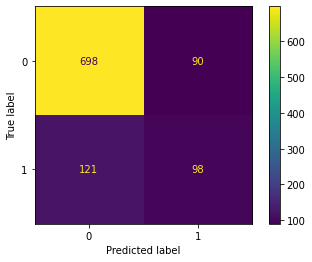

In [43]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()